In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# 大数の法則

大数の法則は「標本の大きさが大きくなるにつれて標本平均が母平均に近づく」というものでした。ここでは平均4、標準偏差0.8の正規分布から10個、110個、…、100100個とサンプリングを繰り返し、それぞれのサンプルの平均値がどのように変化するかを確認してみましょう。

In [ ]:
# 平均4、標準偏差0.8の正規分布を母集団(population)とします
population = stats.norm(loc=4, scale=0.8)

# サンプルサイズを指定（10から100100まで100刻み）
sample_size = np.arange(start=10, stop=100100, step = 100)

# 計算結果を格納する変数を作成
sample_mean = []

# 再現性を確保するためにseedを設定
np.random.seed(1)
for i in sample_size:
    #sample_size分だけpolulationからサンプリング　　
    sample = population.rvs(size = i)
    sample_mean.append(sp.mean(sample))

In [ ]:
plt.plot(sample_size, sample_mean)
plt.xlabel('sample_size')
plt.ylabel('sample_mean')

# 中心極限定理

中心極限定理とは「母集団の分布が何であれ、サンプルサイズが大きい場合には確率変数の和は正規分布に近いものとなる」というものでした。

コインを投げるという事象はベルヌーイ試行であり、これを繰り返すと二項分布に従うということはLesson9で学習しました。この事象を例にとって、コインを10000回投げた場合に表が出た回数を数える、という試行を50000回繰り返してみましょう。この法則によるならば、結果は正規分布に近いものとなるはずです。

In [14]:
n_size=1000
n_trial=5000
coin=np.array([0,1])

np.random.seed(1)

result=[]
for i in range(n_trial):
    #coinからn_size回ランダムサンプリングを実施
    result_each_trial=np.random.choice(coin, size=n_size, replace=True)
    #random.choiceは指定した配列からランダムに抽出
    count_head=sum(result_each_trial）
    result.append(count_head)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


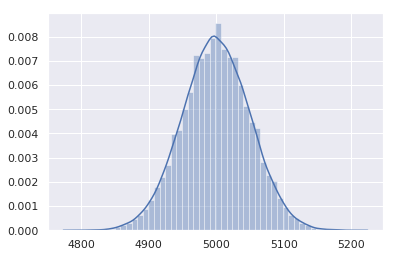

In [16]:
sns.distplot(result)

# 二項分布とポアソン分布

二項分布の期待値はnを試行回数、pを成功確率とした場合npで与えられることがわかっていました。こちらについてもシミュレーションで確認してみましょう。
成功確率p=0.00000003となる事象をn=100000000回繰り返したとします。この試行を10000回行った場合に成功する回数を数えてみましょう。

In [17]:
n=100000000
p=0.00000003

np.random.seed(1)
result=np.random.binomial(n=n, p=p, size=10000)
# biomialは二項分布に従う乱数

(array([1992., 2233., 2273., 1711.,  986.,  471.,  219.,   80.,   30.,
           5.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

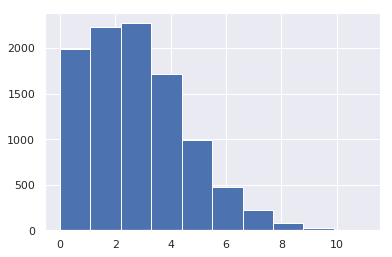

In [18]:
plt.hist(result)

In [19]:
print(sum(result)/len(result))

2.9876


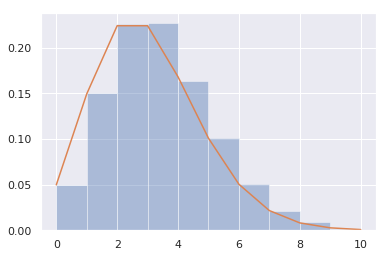

In [32]:
poisson= sp.stats.poisson(mu=3)
# λ＝3のポアソン分布の確率質量関数を規定

np.random.seed(1)
rvs_poisson= poisson.rvs(size=10000)
# 〇〇.rvsは確率分布〇〇に従う乱数を取得（seedで固定）

m= list(range(0,11))
pmf_poisson = poisson.pmf(k=m)
# 〇〇.pmfは離散型確率分布〇〇でk回成功する確率を取得

sns.distplot(rvs_poisson,bins=m,kde=False,norm_hist=True)
# kdeをオフにした場合、y軸の単位が実数になるので、norm_hist=Trueで単位を確率としてに表示確率に
plt.plot(m, pmf_poisson)

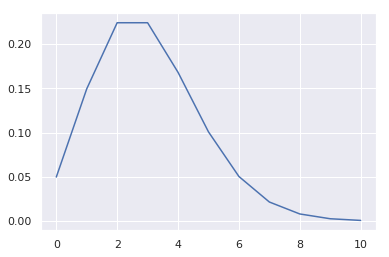

In [33]:
binomial= sp.stats.binom(n=n, p=p)
# 成功確率pとなる事象をn回繰り返す二項分布の確率質量関数を規定

np.random.seed(1)
pmf_binomial= binomial.pmf(k=m)
plt.plot(m,pmf_binomial)